In [26]:
import pandas as pd  # 데이터 불러오기
import matplotlib.pyplot as plt
df = pd.read_csv('C:/Users/황준하/PycharmProjects/pythonProject/국가건강검진_혈압혈당데이터.csv', sep=',')

In [8]:
print(df)

        SEX  BTH_G  SBP  DBP  FBS  DIS   BMI
0         1      1  116   78   94    4  16.6
1         1      1  100   60   79    4  22.3
2         1      1  100   60   87    4  21.9
3         1      1  111   70   72    4  20.2
4         1      1  120   80   98    4  20.0
...     ...    ...  ...  ...  ...  ...   ...
999995    2     27  120   70   81    2  23.1
999996    2     27  110   70  104    2  27.2
999997    2     27  115   53  110    1  25.2
999998    2     27  120   70   90    2  19.7
999999    2     27  116   73   92    4  17.6

[1000000 rows x 7 columns]


In [9]:
res = df.loc[:,['SEX','DIS','SBP']]  # DIS가 2인(고혈압인) 사람들의 최고혈압 데이터 필터링
ft= res['DIS'].isin([2])
res2=res[ft]
print(res2)

        SEX  DIS  SBP
52        1    2   90
133       1    2  100
204       1    2  170
255       1    2  135
288       1    2  130
...     ...  ...  ...
999987    2    2  139
999992    2    2  120
999995    2    2  120
999996    2    2  110
999998    2    2  120

[162826 rows x 3 columns]


In [10]:
res2['SBP'].describe()  # 고혈압인 사람들의 최고혈압 통계

count    162826.000000
mean        130.551300
std          14.851658
min          82.000000
25%         120.000000
50%         130.000000
75%         140.000000
max         190.000000
Name: SBP, dtype: float64

Text(0.5, 1.0, 'Boxplot of SBP by DIS Status')

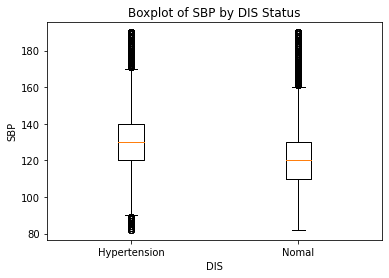

In [11]:
ft2=res['DIS'].isin([4])   # 고혈압과 정상인의 최고혈압 비교
nomal=res[ft2]
boxplot = plt.figure()
axes= boxplot.add_subplot(1,1,1)

axes.boxplot([res2['SBP'],nomal['SBP']],labels=['Hypertension','Nomal'])
axes.set_xlabel('DIS')
axes.set_ylabel('SBP')
axes.set_title('Boxplot of SBP by DIS Status')

In [27]:
df.groupby('DIS')['SBP'].mean()  # 고혈압/당뇨병 진료여부에 따른 최고혈압 평균

DIS
1    130.563972
2    130.551300
3    123.322146
4    119.252575
Name: SBP, dtype: float64

In [42]:
df.groupby('DIS')['DBP'].mean()  # 고혈압/당뇨병 진료여부에 따른 최저혈압 평균

DIS
1    78.366193
2    80.040417
3    75.679478
4    74.673427
Name: DBP, dtype: float64

In [34]:
df.groupby(['BTH_G','DIS'])['SBP'].mean()  # 연령별 고혈압/당뇨병 진료여부에 따른 최고혈압 평균

BTH_G  DIS
1      1      132.666667
       2      126.725000
       3      117.354430
       4      114.120764
2      1      139.333333
                 ...    
26     4      125.944622
27     1      132.181784
       2      132.283068
       3      127.378951
       4      126.221835
Name: SBP, Length: 108, dtype: float64

In [35]:
df.groupby(['SEX','BTH_G','DIS'])['SBP'].mean() # 성별과 연령별 고혈압/당뇨병 진료여부에 따른 최고혈압 평균

SEX  BTH_G  DIS
1    1      1      128.166667
            2      133.034483
            3      123.206897
            4      119.441295
     2      1      146.500000
                      ...    
2    26     4      126.003162
     27     1      132.889138
            2      132.495482
            3      127.763872
            4      126.356684
Name: SBP, Length: 216, dtype: float64

In [36]:
df.groupby(['SEX','BTH_G','DIS'])['FBS'].mean() # 성별과 연령별 고혈압/당뇨병 진료여부에 따른 공복혈당 평균

SEX  BTH_G  DIS
1    1      1      189.000000
            2       91.500000
            3      158.827586
            4       89.022748
     2      1      158.500000
                      ...    
2    26     4       95.862472
     27     1      123.363414
            2       99.583191
            3      122.804562
            4       96.757149
Name: FBS, Length: 216, dtype: float64

In [37]:
Hy_ft = df['DIS'].isin([2])  # 연령별 고혈압진료를 받은 사람 수
Hy_res=df[Hy_ft]
Hy_res.groupby('BTH_G')['DIS'].count()

BTH_G
1        80
2        95
3       143
4       235
5       426
6       564
7       791
8      1014
9      2238
10     2848
11     3652
12     4470
13     5430
14     6496
15     8640
16    10009
17    10308
18    10926
19     9983
20     9686
21     9724
22    10980
23     8099
24     8411
25     9539
26     7468
27    20571
Name: DIS, dtype: int64

In [38]:
diab_ft = df['DIS'].isin([3])  # 연령별 당뇨병진료를 받은 사람 수
diab_res=df[diab_ft]
diab_res.groupby('BTH_G')['DIS'].count()

BTH_G
1       79
2       55
3      109
4      168
5      203
6      261
7      350
8      394
9      977
10    1050
11    1327
12    1600
13    1797
14    1977
15    2593
16    2988
17    2986
18    3036
19    2743
20    2725
21    2529
22    2618
23    1941
24    1919
25    2068
26    1457
27    3164
Name: DIS, dtype: int64

In [41]:
df.groupby(['SEX','DIS'])['BMI'].mean()  # 성별과 고혈압/당뇨병 진료 여부에 따른 BMI 평균

SEX  DIS
1    1      25.230262
     2      25.032513
     3      24.349331
     4      24.148851
2    1      25.414725
     2      24.802465
     3      24.158218
     4      22.666182
Name: BMI, dtype: float64

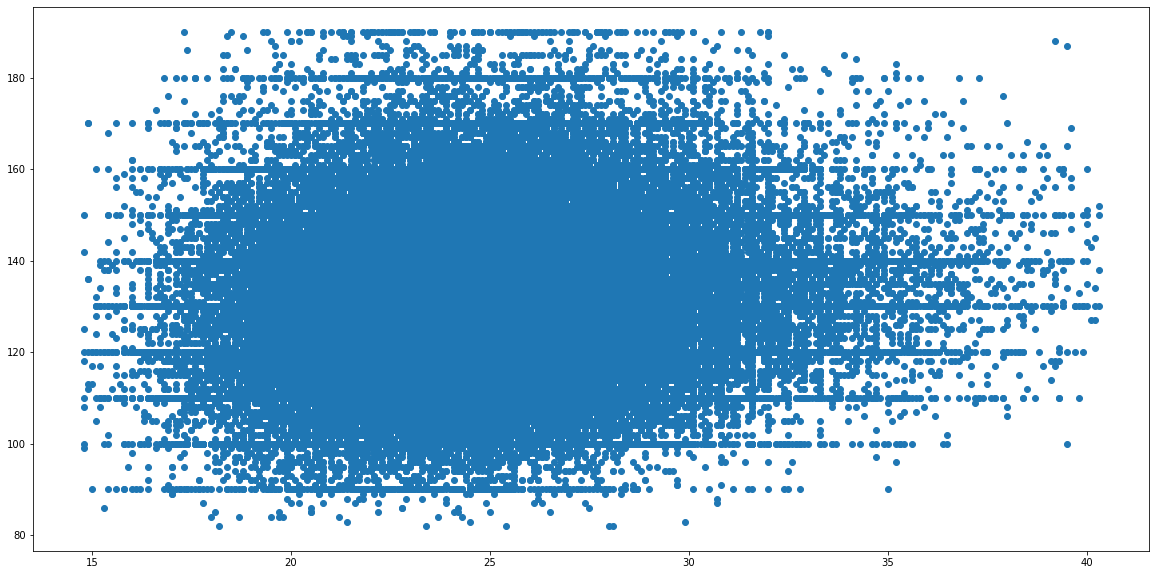

In [60]:
sc_plot=plt.figure(figsize=(20,10))   # 고혈압 환자의 BMI에 따른 최고 혈압
axes = sc_plot.add_subplot(1,1,1)
axes.scatter(x=Hy_res['BMI'],y=Hy_res['SBP'])

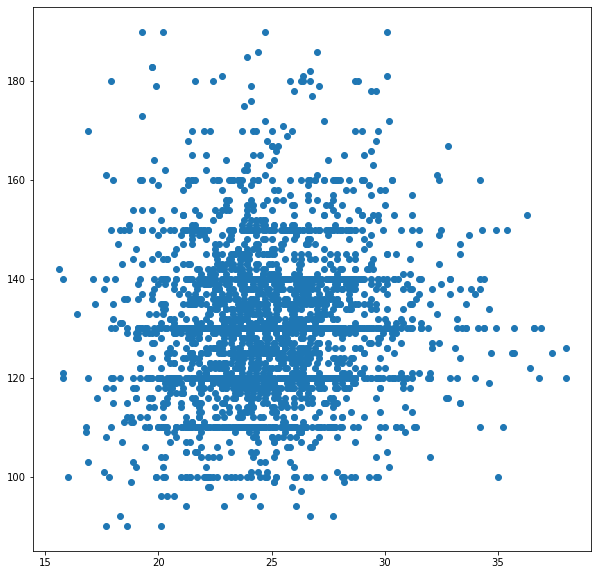

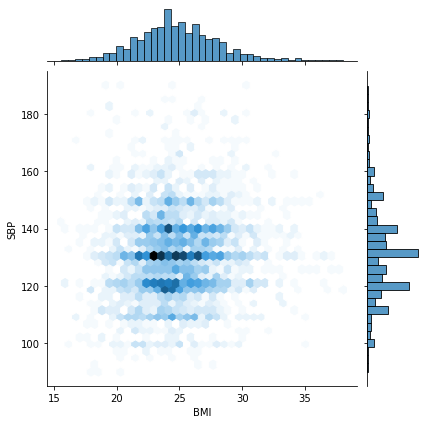

In [86]:
Hy_res2=Hy_res.iloc[0::60,:]  

sc_plot=plt.figure(figsize=(10,10))   # 고혈압 환자의 BMI에 따른 최고 혈압
axes = sc_plot.add_subplot(1,1,1)
axes.scatter(x=Hy_res2['BMI'],y=Hy_res2['SBP'])

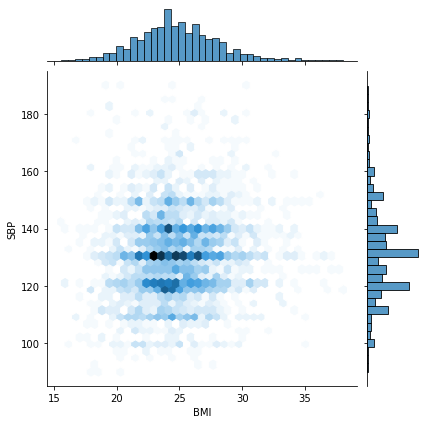

In [89]:
import seaborn as sns   # 각 BMI와 최고 혈압에서의 고혈압 환자 빈도
hexplot=sns.jointplot(x=Hy_res2['BMI'],y=Hy_res2['SBP'], data='DIS', kind="hex")

In [121]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import numpy as np

clf = MLPClassifier(solver='adam', max_iter=1000,  alpha=1e-5,
                     hidden_layer_sizes=(5, 5, 5, 5), random_state=1)

X = df.drop(['FBS','BMI','DIS'], axis=1)
Y = df['DIS']
clf.fit(X, Y)

test_X = np.array([[1,1,127,79]], dtype=np.int64)
Filter3= df['DIS'].isin([4])
test_y=df[Filter3]

predict_y = clf.predict(test_X)
print(predict_y)
print(classification_report([4], predict_y))

[4]
              precision    recall  f1-score   support

           4       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



0         4
1         4
2         4
3         4
4         4
         ..
999972    4
999985    4
999988    4
999994    4
999999    4
Name: DIS, Length: 740662, dtype: int64